# Calculate modes and cut-off frequencies

In [ ]:
import wrmodes as wr
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as sc

In [ ]:
# WR-90 sides in meters
wr90_long = 0.9 * 0.0254
wr90_short = 0.4 * 0.0254

# Maximum frequency in Hz
max_frequency = 50e9  # 50 GHz

# List all propagating modes in WR-90 at frequency `max_frequency`
modes = wr.list_propagating_modes(
    max_frequency,
    wr90_long, 
    wr90_short, 
    mu=sc.mu_0,
    epsilon=sc.epsilon_0,
)

for mode in modes:
    print(f"Mode: {mode[0]}, Cutoff Frequency: {mode[3]*1e-9:.2f} Hz")


Mode: TE1,0, Cutoff Frequency: 6.56 Hz
Mode: TE2,0, Cutoff Frequency: 13.11 Hz
Mode: TE0,1, Cutoff Frequency: 14.75 Hz
Mode: TE1,1, Cutoff Frequency: 16.15 Hz
Mode: TM1,1, Cutoff Frequency: 16.15 Hz
Mode: TE3,0, Cutoff Frequency: 19.67 Hz
Mode: TE2,1, Cutoff Frequency: 19.74 Hz
Mode: TM2,1, Cutoff Frequency: 19.74 Hz
Mode: TE3,1, Cutoff Frequency: 24.59 Hz
Mode: TM3,1, Cutoff Frequency: 24.59 Hz
Mode: TE4,0, Cutoff Frequency: 26.23 Hz
Mode: TE0,2, Cutoff Frequency: 29.51 Hz
Mode: TE4,1, Cutoff Frequency: 30.09 Hz
Mode: TM4,1, Cutoff Frequency: 30.09 Hz
Mode: TE1,2, Cutoff Frequency: 30.23 Hz
Mode: TM1,2, Cutoff Frequency: 30.23 Hz
Mode: TE2,2, Cutoff Frequency: 32.29 Hz
Mode: TM2,2, Cutoff Frequency: 32.29 Hz
Mode: TE5,0, Cutoff Frequency: 32.79 Hz
Mode: TE3,2, Cutoff Frequency: 35.46 Hz
Mode: TM3,2, Cutoff Frequency: 35.46 Hz
Mode: TE5,1, Cutoff Frequency: 35.95 Hz
Mode: TM5,1, Cutoff Frequency: 35.95 Hz
Mode: TE6,0, Cutoff Frequency: 39.34 Hz
Mode: TE4,2, Cutoff Frequency: 39.48 Hz
M

# Calculate mode conversion losses on a bend

Compare with Q. Zhang, C.-W. Yuan, and L. Liu, “Theoretical Design and Analysis for TE20–TE10 Rectangular Waveguide Mode Converters,” IEEE Transactions on Microwave Theory and Techniques, vol. 60, no. 4, pp. 1018–1026, Apr. 2012, doi: 10.1109/TMTT.2011.2182206.

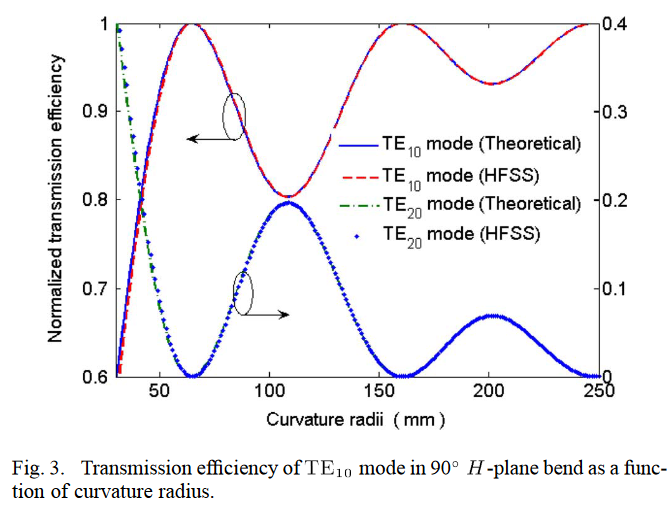

Resolution set to 14 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 17 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 19 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 21 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 24 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 26 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 28 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 31 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 33 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 35 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 38 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 40 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 42 points based on the lowest wavelength 3.38e-02 m.
Resolution set to 45 points based on the lowest wavelength 3.38e-02 m.
Resolu

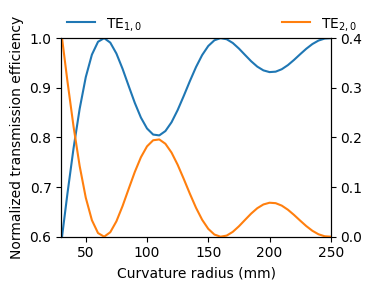

In [ ]:
a = 44e-3
b = 30e-3
theta_deg = 90
f = 9.5e9

te10_s21 = []
te20_s21 = []

radii = np.arange(30e-3, 260e-3, 5e-3)

for R0 in radii:

    def c_radius(z):
        return 1 / (R0 * np.ones_like(z))
    
    theta = np.radians(theta_deg)
    LB = R0 * theta

    mode_in = ('TE', 1, 0)

    coupled_modes, result = wr.solve_mode_coupling(f, a, b, mode_in, length=LB, curvature=c_radius, verbose=False, maximum_modes=11, resolution='auto', tol=1e-1)

    # Calculate S21
    i = [m[0] for m in coupled_modes].index(f"TE1,0")
    j = [m[0] for m in coupled_modes].index(f"TE2,0")

    te10_s21.append(np.abs(result.y[i, -1])**2)
    te20_s21.append(np.abs(result.y[j, -1])**2)


plt.figure(figsize=(4, 3))
plt.plot(radii*1e3, te10_s21, label=r'TE$_{1,0}$')
plt.xlabel("Curvature radius (mm)")
plt.ylim(0.6, 1)
plt.ylabel('Normalized transmission efficiency')
plt.legend(loc=(0, 1), frameon=False)
plt.twinx()
plt.plot(radii*1e3, te20_s21, label=r'TE$_{2,0}$', color='C1')
plt.ylim(0, 0.4)

plt.tight_layout()
plt.xlim(30, 250)
plt.legend(loc=(0.8, 1), frameon=False)